# The problem of evaluating clustering
**Topics**
- Use of datasets from `scikit-learn`
- Clustering algorithms from `scikit-learn`
- Techniques and metrics for evaluating clustering

In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

In [3]:
import matplotlib.pyplot as plt

## Datasets for classification
Synthetic and real datasets

### Make blobs

In [4]:
from sklearn.datasets import make_blobs

In [10]:
X, y = make_blobs(n_samples=10000, centers=3, n_features=2, random_state=0, 
                  cluster_std=.5, center_box=(-10.0, 10.0))

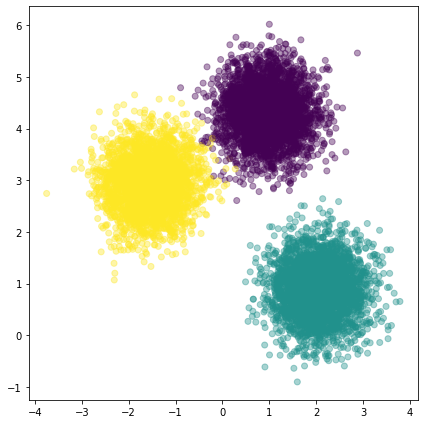

In [11]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X[:,0], X[:,1], c=y, alpha=0.4)
plt.tight_layout()
plt.show()

### IRIS

In [12]:
from sklearn import datasets
from sklearn.decomposition import PCA

In [16]:
data = datasets.load_iris(return_X_y=False, as_frame=True)

In [19]:
data.data.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


In [21]:
data.target.head(2)

0    0
1    0
Name: target, dtype: int64

In [22]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
pca = PCA(n_components=2)
pca.fit(data.data)
X_iris = pca.transform(data.data)

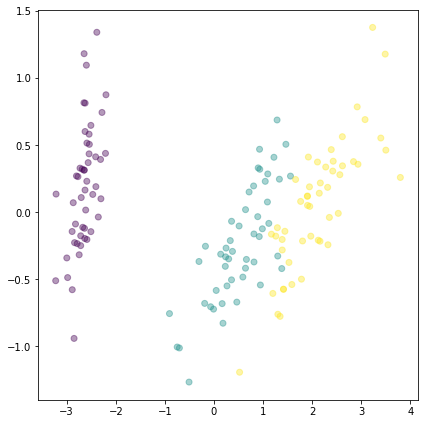

In [25]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_iris[:,0], X_iris[:,1], c=data.target.values, alpha=0.4)
plt.tight_layout()
plt.show()

## MNIST

In [26]:
images = datasets.load_digits(as_frame=True)

In [29]:
images.data.head(2)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0


In [31]:
images.target.head(5)

0    0
1    1
2    2
3    3
4    4
Name: target, dtype: int64

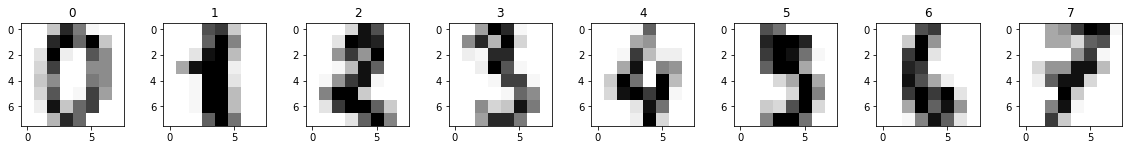

In [40]:
cols = 8
fig, ax = plt.subplots(figsize=(16, 2), ncols=8)
for i, row in images.data.iloc[:8].iterrows():
    ax[i].imshow(row.values.reshape(8, -1), cmap='Greys')
    ax[i].set_title(images.target[i])
plt.tight_layout()
plt.show()

# Clustering

In [41]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [42]:
benchmark = {
    'KM': KMeans,
    'HC': AgglomerativeClustering
}

## Train and Test split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
def split(X, y, test_size=0.33):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    return X_train, X_test, y_train, y_test

## Fit and Predict

## Evaluate
See [https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation](https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation)

In [45]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, adjusted_rand_score